In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
len(df)

8807

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# **Observation from above steps**

### There are around 8807 records of Netflix data and as a first step of data cleansing we can see that there are null values in columns as follows:
### 1. 'director' with 2634 nan values.
### 2. 'cast' with 825 values.
### 3. 'country' with 831 values.
### 4. 'date_added' with 10 values.
### 5. 'rating' with 4 values.
### 6. 'duration' with 3 values.

# Split and Stack Operation using explode function.

### Columns **cast** and **listed_in** contain multiple data so data is splitted and stacked using explode function.

In [ ]:
df['cast'] = df['cast'].str.split(',')
df = df.explode('cast')
df['cast'] = df['cast'].str.strip(',')
df['cast'] = df['cast'].str.strip(' ')

In [ ]:
df['listed_in'] = df['listed_in'].str.split(',')
df = df.explode('listed_in')
df['listed_in'] = df['listed_in'].str.strip(',')
df['listed_in'] = df['listed_in'].str.strip(' ')

## Data Cleansing Operations.
### Here mode is added to fill nan values for column **director** , **cast** and **country**. **date_added** , **rating** and **duration** is dropped as the missing values are insignificant

In [ ]:
df['cast'].fillna(df['cast'].mode()[0],inplace=True)
df['director'].fillna(df['director'].mode()[0],inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['listed_in'].fillna(df['listed_in'].mode()[0],inplace=True)

In [ ]:
df.dropna(subset=['date_added','rating','duration'],inplace=True)

# Conversion of release_year column to datetime year

In [ ]:
df['release_year'] = pd.to_datetime(df['release_year'].astype(str),format='%Y').dt.year

# Content Differenciation
### There are total two type of content as follows Movies and TV Shows. New Column **duration_new** is added to split **duration** column data to get access to movie or TV Show duration.

In [ ]:
df['duration_new']=df['duration'].str.split().apply(lambda x:x[0])
df['duration_new']=df['duration_new'].astype('int')

In [ ]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)

# Top 4 directors
### A Quick Grouping of Director vs Type of Content we ge to know that Director **Cathy Garcis Molina** has done most movies and TV Show for Netflix Platform over the years. Rest of the top 3 directors with respect to directing number of Movies/TV Shows include **Youssef Chahine**, **Martin Scorsese** and **David Dhawan**

### With respect to TV Show we could see **Rob Seidenglanz**,**Kongkiat Komesiri** and **Danny Cannon** being as top TV Show producers for Netflix after **Cathy Garcis Molina**

In [ ]:
dtemp=df.groupby(['director','type']).size().unstack(fill_value=0)

In [ ]:
dtemp.sort_values(['Movie','TV Show'],ascending=False)

type,Movie,TV Show
director,,
Cathy Garcia-Molina,1558,43201
Youssef Chahine,288,0
Martin Scorsese,273,0
David Dhawan,270,0
Steven Spielberg,243,0
...,...,...
"Oscar Micheaux, Spencer Williams, Richard E. Norman, Richard Maurice",0,1
Padraic McKinley,0,1
Peter McDonnell,0,1


In [ ]:
dtemp.sort_values('TV Show',ascending=False)

type,Movie,TV Show
director,,
Cathy Garcia-Molina,1558,43201
Rob Seidenglanz,0,103
Kongkiat Komesiri,0,75
Danny Cannon,0,75
Pass Patthanakumjon,0,66
...,...,...
"Harry Elfont, Deborah Kaplan",22,0
Harshavardhan Kulkarni,15,0
Haruka Fujita,9,0


# Datatype of **date_added** column
### Next step is to change datatype of **date_added** column to datetime type to extract day month and year from the date.

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added_year']=pd.to_datetime(df['date_added']).dt.year

# No of Movie and TV Shows Per Year Comparison

### Here we are comparing Movies and TV Shows frequency released in the platform with respect to years.


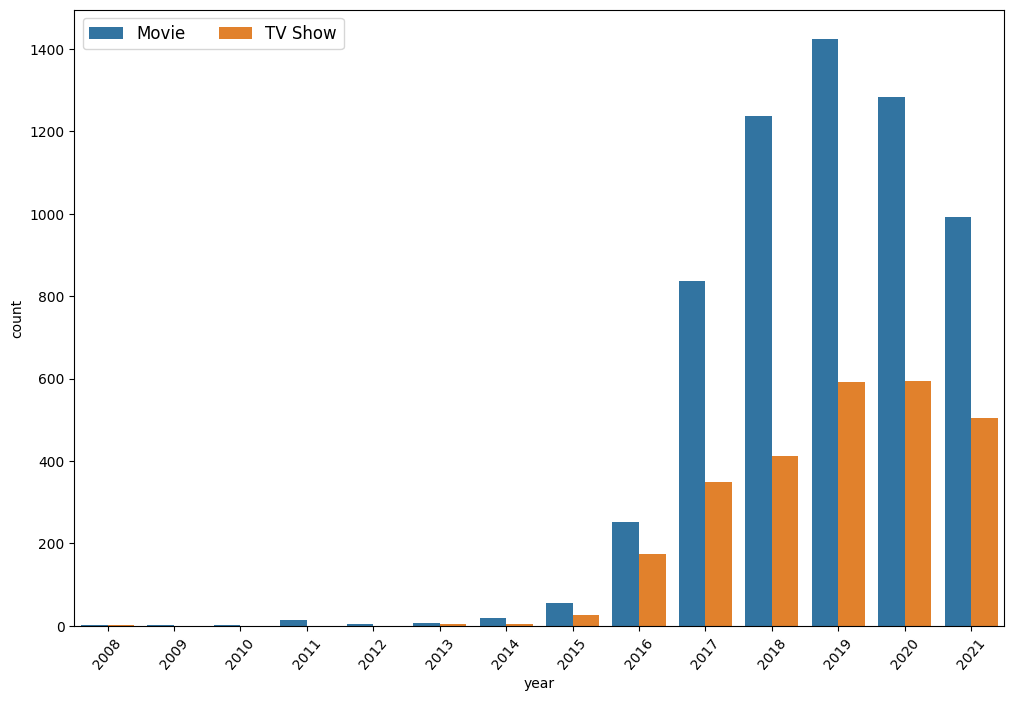

In [ ]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50)
counts=df.loc[:,['type','date_added','title']].drop_duplicates().reset_index(drop=True)
counts['year']=counts['date_added'].dt.year
sns.countplot(data=counts[counts['date_added'].dt.year>=2001], x='year', hue='type')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', fontsize='large',ncol=2)
plt.show()

## Observation:
### We can see that Streaming Platform dominated market after 2015 and over the years Movies dominated over TV Shows and most number of Movies and TV Shows being released in the year 2019.

# Content over years of top 5 directors
### Here we are trying to find top 5 director with respect to their number of movies added to Netlfix to check how and when Netflix started approaching the directors and started making content through them.

In [ ]:
top5_director = df['director'].value_counts().index[:5]
df1=df.loc[(df["director"].isin(top5_director))]

In [ ]:
df2=df1.groupby(['director','date_added_year','type']).size().unstack(fill_value=0).reset_index()

Text(0.5, 1.0, 'TV Show per year')

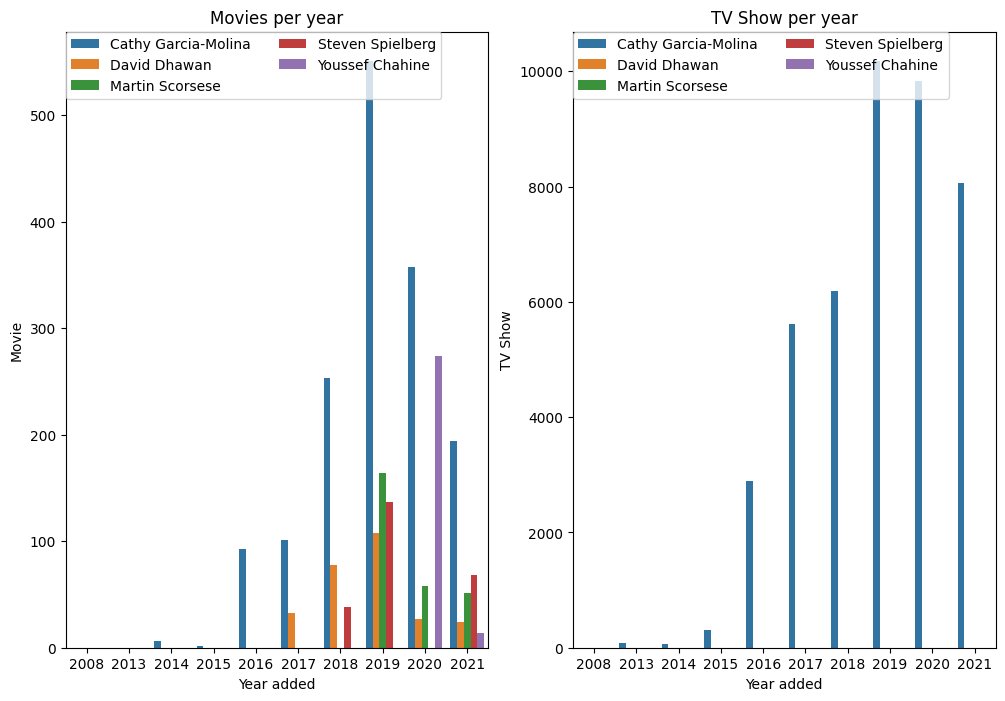

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.barplot(x='date_added_year',y='Movie',data=df2,hue='director')
plt.xlabel('Year added')
plt.title('Movies per year')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.,ncol=2)
plt.subplot(1,2,2)
sns.barplot(x='date_added_year',y='TV Show',data=df2,hue='director')
plt.xlabel('Year added')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.,ncol=2)
plt.title('TV Show per year')

## Observation:
### From the above graph we could clearly see that director **Cathy Garcia-Molina** dominates other directors in both directing Movie and TV Show. in 2019 she delivered more than 500 movies unbeaten by any other directors. **Martin Scorsese** came to picture in 2019 where most of his pictures were added to streaming platform. **David Dhawan** was in peak uptil 2019 after which his prominance got reduced. **Youssef Chahine** is the emerging director after 2020

# Top Actors in Top Genre and their content count

In [ ]:
top3_genre = df['listed_in'].value_counts().index[:3]
df3=df.loc[(df['listed_in'].isin(top3_genre))]


In [ ]:
df4=df3.groupby(['cast','listed_in']).size().unstack(fill_value=0).reset_index()

In [ ]:
top5_actors_comedy=df4.sort_values('Comedies',ascending=False).head(5)['cast']
top5_actors_dramas=df4.sort_values('Dramas',ascending=False).head(5)['cast']
top5_actors_internationalmovies=df4.sort_values('International Movies',ascending=False).head(5)['cast']

In [ ]:
top5_data=df4[df4['cast'].isin(top5_actors_comedy) | df4['cast'].isin(top5_actors_dramas) | df4['cast'].isin(top5_actors_internationalmovies)]

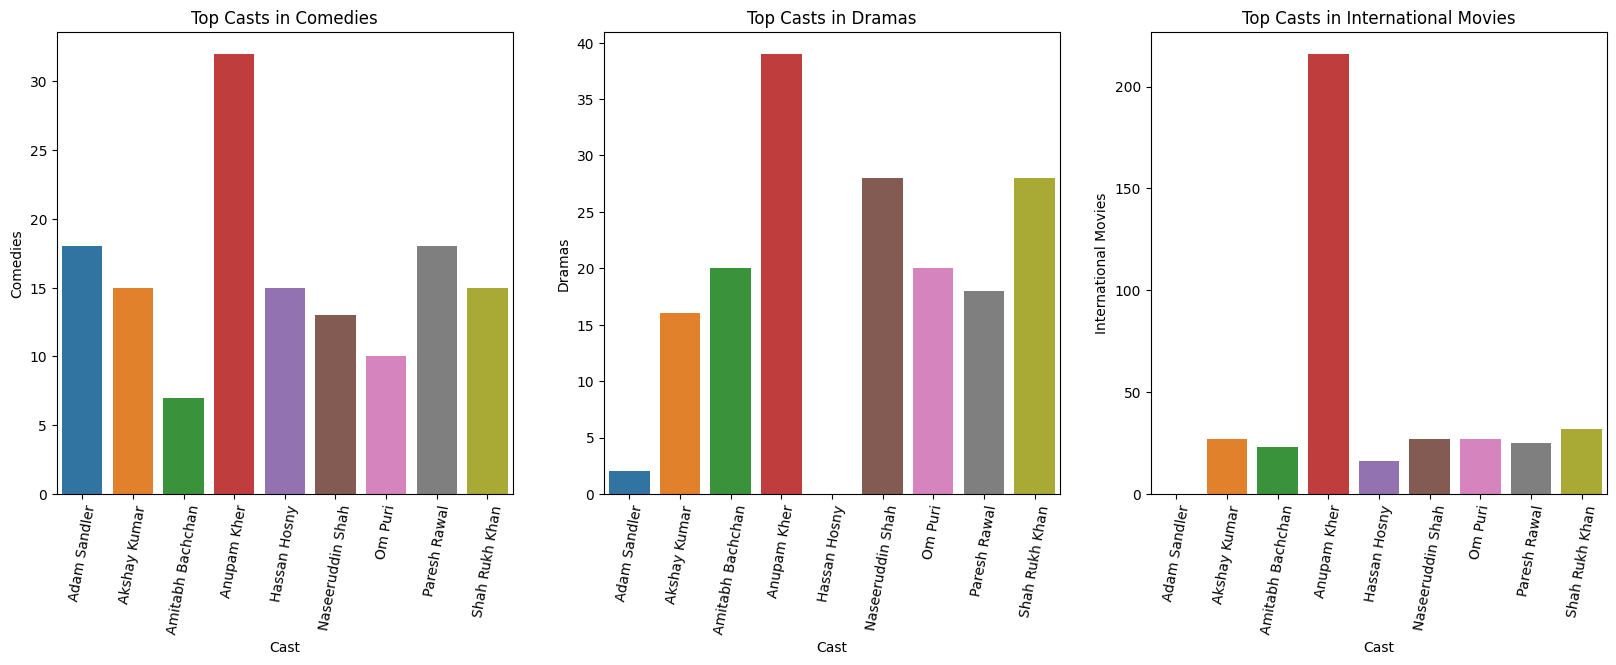

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x='cast',y='Comedies',data=top5_data)
plt.xlabel('Cast')
plt.title('Top Casts in Comedies')
plt.xticks(rotation=80)
plt.subplot(1,3,2)
sns.barplot(x='cast',y='Dramas',data=top5_data)
plt.xlabel('Cast')
plt.title('Top Casts in Dramas')
plt.xticks(rotation=80)
plt.subplot(1,3,3)
sns.barplot(x='cast',y='International Movies',data=top5_data)
plt.xlabel('Cast')
plt.title('Top Casts in International Movies')
plt.xticks(rotation=80)
plt.show()

# Observation:
### From the above graph we could see **Anupam Kher** dominated in all the three top Genre formats as an actor. We could see **Nasiruddin Shah** and **Shah Rukh Khan** dominating in Dramas and International Movies. In Comedies, **Paresh Rawal**,**Akshay Kumar** and **Adam Sandler** dominating after Anupam Kher.

# Top 4 Genre content produced over the Years

In [ ]:
df5 = df.groupby(['release_year', 'listed_in']).size().reset_index(name='Totalcount')
top4_listed_in = df5['listed_in'].value_counts().index[:4]
top4_data = df5.loc[(df5["listed_in"].isin(top4_listed_in))]

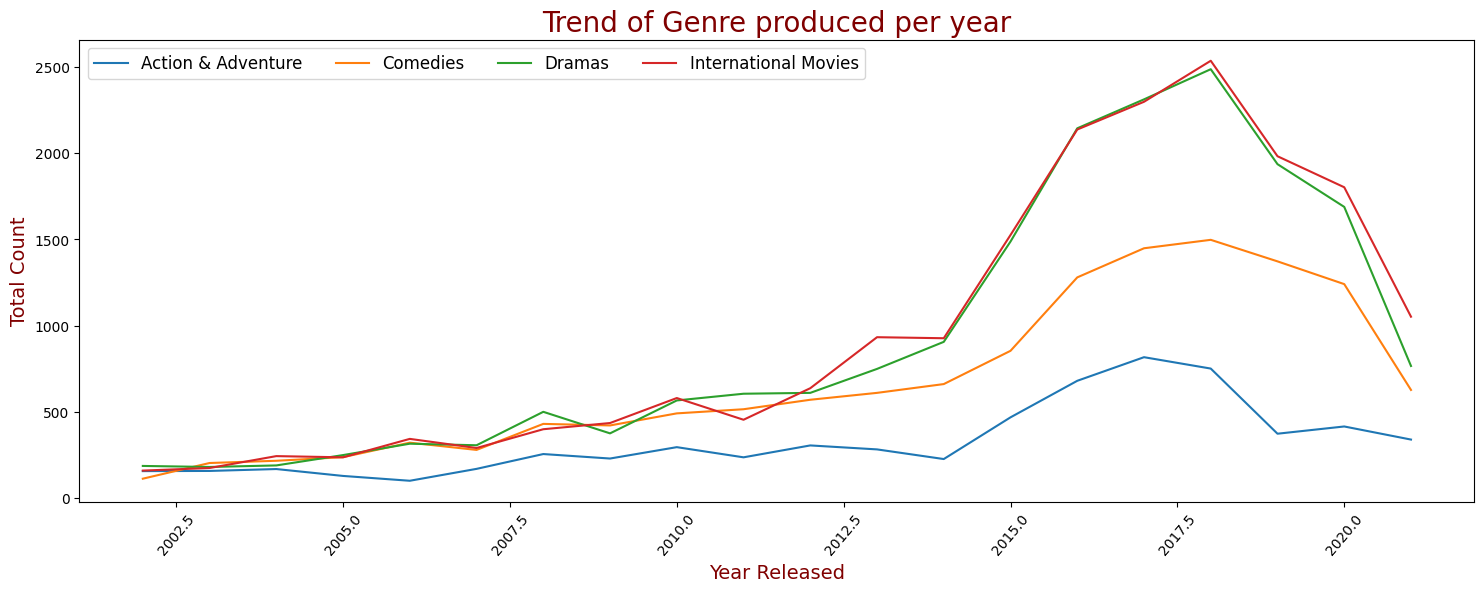

In [ ]:
plt.figure(figsize=(18, 6))
plt.xticks(rotation=50)
sns.lineplot(data=top4_data[top4_data['release_year']>2001], x='release_year',y='Totalcount', hue='listed_in')
plt.title('Trend of Genre produced per year',color='maroon',fontsize=20)
plt.xlabel('Year Released',color='maroon',fontsize=14)
plt.ylabel('Total Count',color='maroon',fontsize=14)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', fontsize='large',ncol=4)
plt.show()

# Observation:
### From the above graph we could see After 2013 International Movies and Dramas content outperformed compared to other Genres like Action and Comedies.

# Heatmap for all Genre columns

In [ ]:
df6=df.groupby(['show_id','listed_in']).size().unstack(fill_value=0)

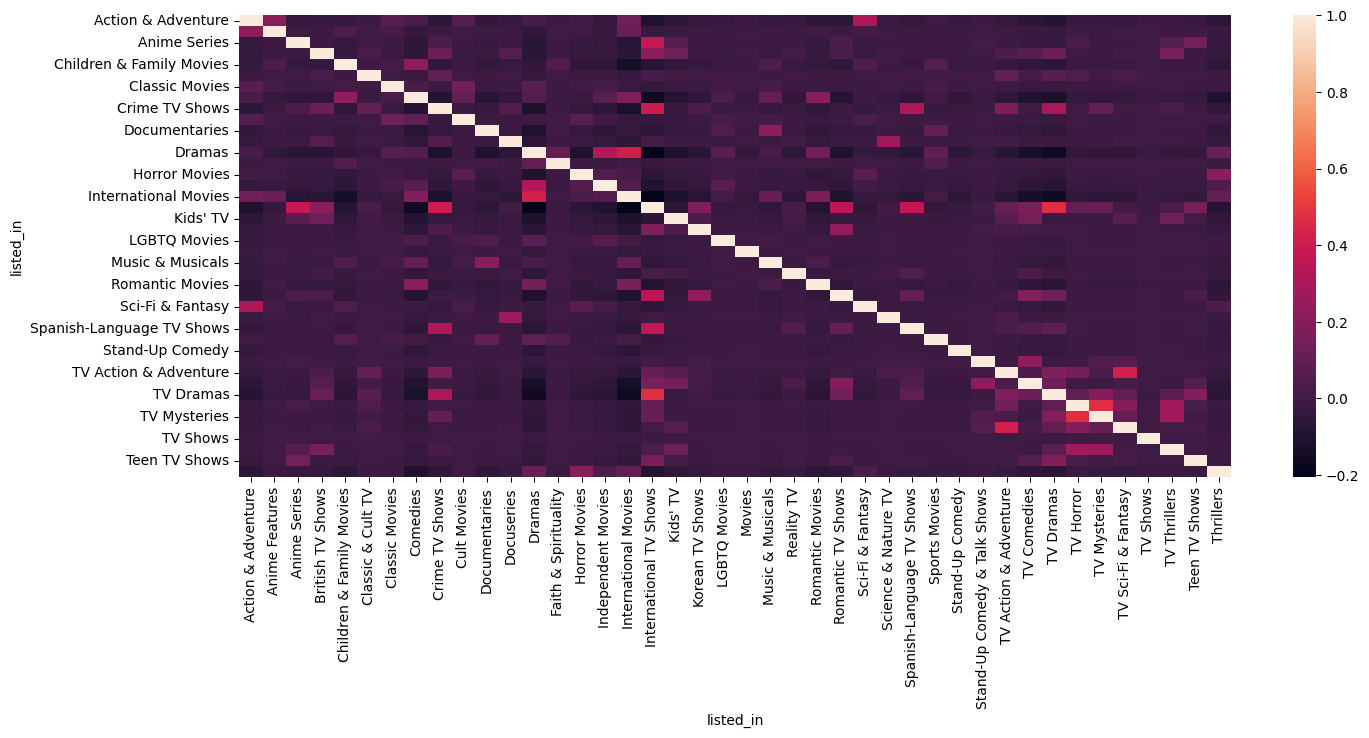

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df6.corr())
plt.show()

# Observation:
### From the above representation, we can see that the following pairs (TV Dramas,International TV Shows),(TV Horrors,TV Mystries),(TV Mystries, TV Action and Adventure),(TV,Dramas,TV Mystries) are positively correlated while pairs(International TV Shows,International Movies),(International TV Shows,Dramas),(International Movies,TV Dramas) are negatively correlated which could help in deciding script and content to reach more audience

# Average TV Show and Movie duration

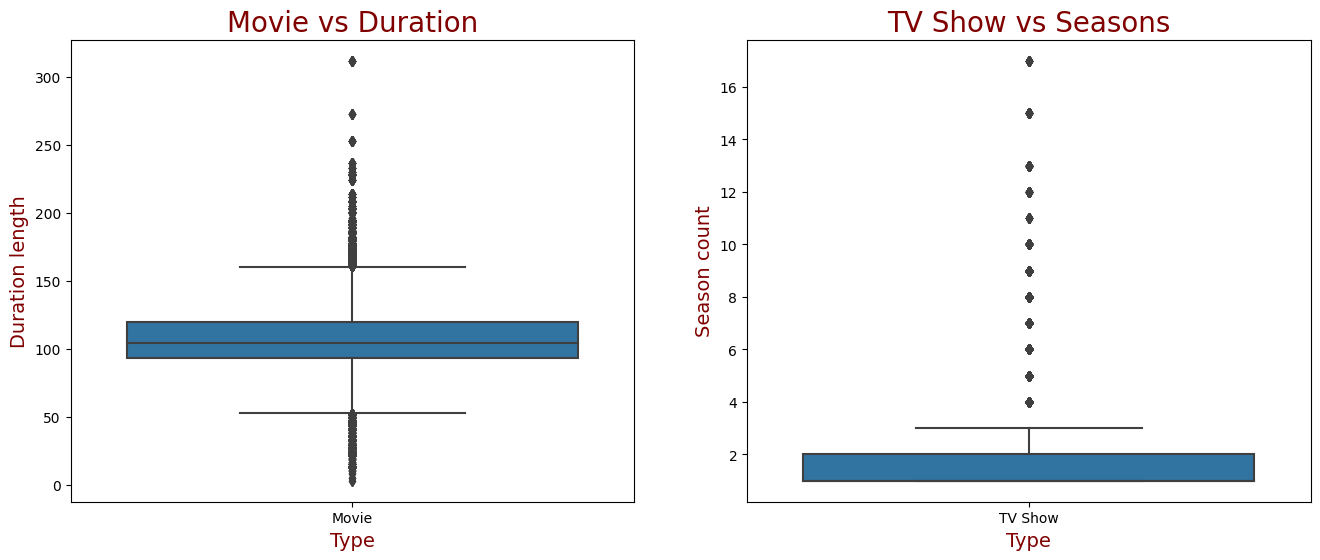

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='type',y='duration_new',data=df[df['type'] == 'Movie'])
plt.xlabel('Type',color='maroon',fontsize=14)
plt.title('Movie vs Duration',color='maroon',fontsize=20)
plt.ylabel('Duration length',color='maroon',fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(x='type',y='duration_new',data=df[df['type'] == 'TV Show'])
plt.title('TV Show vs Seasons',color='maroon',fontsize=20)
plt.xlabel('Type',color='maroon',fontsize=14)
plt.ylabel('Season count',color='maroon',fontsize=14)
plt.show()

# Observation:
### From the above graph we could see that average Movie duration is around 110 minutes and TV Show is having average duration of 1 to 2 seasons. While there are Movies of duration 310 mins long and also of just being 2mins. In TV Shows, there are seasons beyond 16 seasons. But Netflix is more concentrated on movies of duration 110 mins and TV Shows of 1 or 2 seasons.

# Movie/TV Show rating comparison over the years

In [ ]:
df6=df.loc[:,['title','rating']].drop_duplicates()
df7=df.groupby(['release_year','rating']).size().reset_index(name='TotalCount')

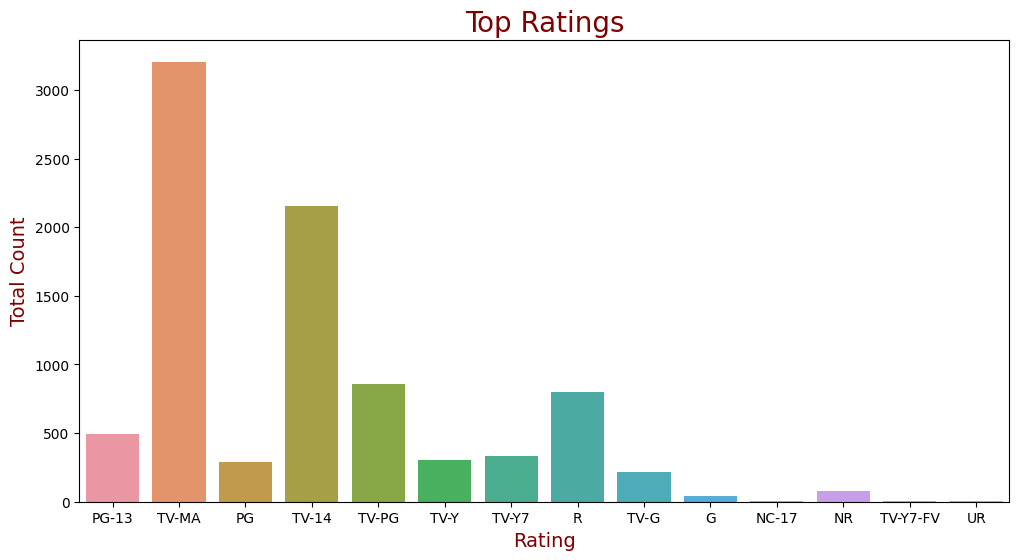

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='rating',data=df6)
plt.title('Top Ratings',color='maroon',fontsize=20)
plt.xlabel('Rating',color='maroon',fontsize=14)
plt.ylabel('Total Count',color='maroon',fontsize=14)
plt.show()

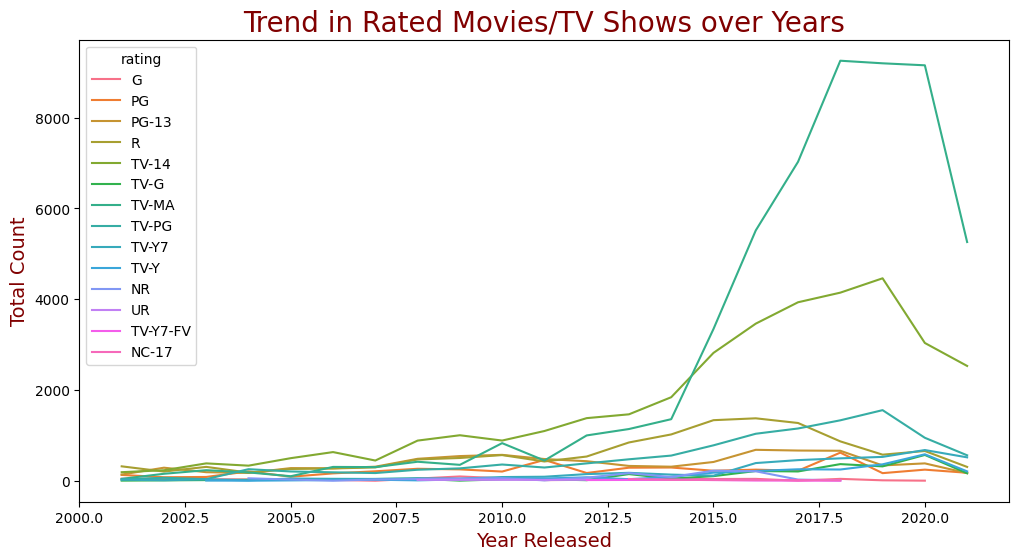

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year',y='TotalCount',hue='rating',data=df7[(df7['release_year']>2000)])
plt.title('Trend in Rated Movies/TV Shows over Years',color='maroon',fontsize=20)
plt.xlabel('Year Released',color='maroon',fontsize=14)
plt.ylabel('Total Count',color='maroon',fontsize=14)
plt.show()

# Inference:

### From the above graph, we can observe that TV-MA contents are more produced by Netflix over the recent years and other being TV-14 rated content. We could see a sharp rise in TV-MA,TV-14 rated content after 2013, indicating Netflix producing more content for Adult audiences. We can also see substancial rise in TV-PG rated content after 2017 indicating Netflix wants trying to capture other section of audiences along with adults.

# Content distribution based on Region

In [ ]:
df8=df['country'].value_counts().reset_index().rename(columns={'index':'Country','country':'Total Count'})

<function matplotlib.pyplot.show(close=None, block=None)>

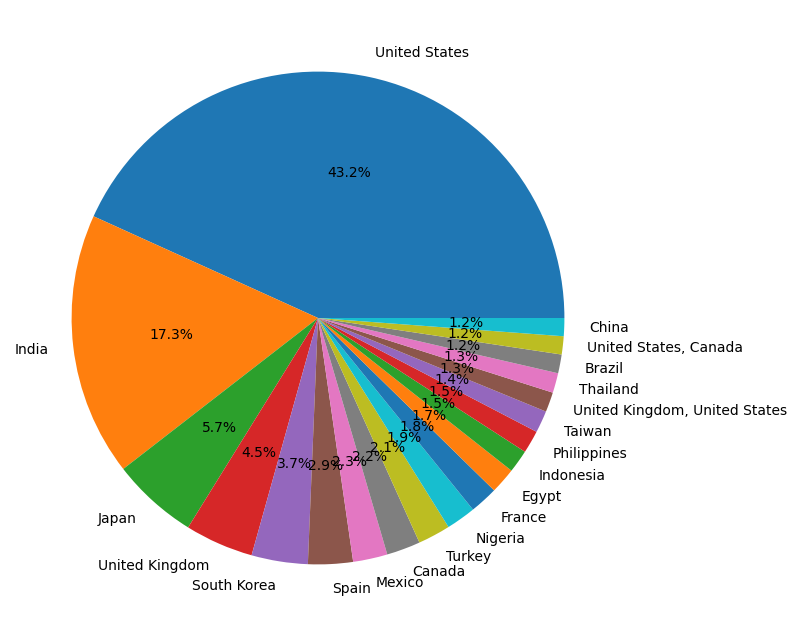

In [ ]:
plt.figure(figsize=(12,8))
plt.pie('Total Count',labels='Country',autopct='%2.1f%%',data=df8.head(20))
plt.show

# Inference:

### From the above graph, we could see most number of movies being produced in United States (43.2%) and next most dominant market being India(17.3%). Netflix has less content in rest of the countries,other significant market being Japan, United Kingdom and South Korea combined.

# Conculsion and Recommendation:

### Netflix being dominant OTT platform with higher market share there could be certain changes whih can be applied for significant growth of the platform.

### 1. Netflix should produce more content for wider audiences including audience in the range 12 to 17.
### 2. Netflix producing more movie content should also focus on producing TV shows as it can increase watch time of customers.
### 3. With majority of seasons being 2 in average, it can be averaged to 5 and more in years with more quality content.
### 4. It should also focus on increasing average duration of movies to 2 hours with good content.
### 5. It should start promoting other directors as there are less number of more content producing directors.
### 6. Netflix should start focusing other countries producing multilingual and regional content. Important market being China with more population, Netflix has just 1.2% of the total movie produced. It should work with directors from those regions who are already contributing in production of content
###7. Netflix should also focus on other Genre types and also more content on the combination of Genres based on the correlation data discussed gaining significant audience in future.